In [28]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, LeaveOneOut

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


df = pd.read_csv("SMSSpamCollection.txt", sep = '\t', header=None)
df

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [29]:
capital_count = [len(re.findall(r'[A-Z]', item)) for item in df[1]]


print("Number of capitals:", capital_count)

Number of capitals: [3, 2, 10, 2, 2, 7, 2, 10, 12, 14, 2, 17, 40, 3, 26, 23, 1, 3, 2, 32, 1, 1, 2, 3, 3, 8, 1, 6, 2, 5, 1, 5, 1, 2, 13, 3, 2, 2, 2, 4, 4, 10, 7, 15, 3, 1, 1, 1, 2, 7, 2, 1, 1, 7, 24, 7, 12, 2, 1, 1, 3, 2, 3, 2, 2, 6, 3, 24, 5, 1, 3, 1, 35, 1, 1, 2, 1, 1, 1, 4, 2, 2, 1, 1, 1, 2, 4, 5, 1, 1, 2, 4, 19, 4, 3, 18, 1, 1, 5, 1, 2, 4, 2, 10, 4, 1, 2, 3, 1, 5, 2, 1, 1, 3, 21, 4, 11, 2, 2, 2, 16, 25, 0, 3, 2, 0, 1, 4, 1, 75, 1, 1, 2, 1, 14, 16, 2, 2, 2, 12, 4, 1, 2, 5, 2, 1, 1, 9, 1, 1, 1, 1, 1, 2, 10, 5, 1, 1, 7, 5, 2, 4, 1, 3, 31, 20, 1, 22, 1, 3, 1, 10, 4, 1, 3, 2, 1, 1, 1, 2, 17, 4, 2, 1, 1, 1, 6, 1, 13, 3, 3, 3, 5, 1, 2, 3, 1, 1, 1, 4, 4, 1, 2, 28, 1, 1, 0, 11, 1, 8, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 4, 2, 1, 2, 4, 20, 2, 15, 1, 8, 1, 2, 1, 2, 1, 17, 2, 1, 1, 20, 5, 1, 38, 3, 2, 1, 3, 1, 1, 4, 12, 2, 3, 1, 2, 1, 2, 2, 2, 21, 6, 1, 3, 28, 2, 2, 2, 1, 20, 3, 6, 1, 2, 26, 2, 2, 1, 1, 2, 2, 3, 1, 3, 2, 1, 3, 2, 1, 0, 10, 1, 1, 2, 1, 1, 2, 22, 10, 34, 2, 2, 3, 3, 2, 1, 19, 3, 1, 2, 1

In [30]:
number_count = [len(re.findall(r'[0-9]', item)) for item in df[1]]

print("Number of numbers:", number_count)

Number of numbers: [0, 0, 25, 0, 0, 4, 0, 1, 19, 13, 0, 22, 20, 0, 0, 0, 0, 1, 0, 23, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 1, 0, 0, 0, 0, 15, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 22, 3, 18, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 22, 0, 1, 22, 0, 0, 34, 26, 0, 22, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 13, 0, 0, 0, 5, 0, 0, 0, 2, 0, 0, 0, 14, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 11, 20, 0, 0, 0, 13, 1, 0, 18, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 22, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 31, 0, 2, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 24, 0, 0, 0, 1, 0, 0, 0, 1, 0, 22, 1, 0, 0, 2, 0, 0, 0, 0, 14, 0, 0, 0, 10, 13, 0, 0, 0, 19, 0, 0, 0, 0, 12, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 5, 0, 3, 18, 0, 2, 0

In [31]:
special_chars = [re.sub(r'[a-zA-Z0-9\s]', "", item) for item in df[1]]


special_char_count = [len(item) for item in special_chars]


print("Number of special characters:", special_char_count)

Number of special characters: [9, 6, 6, 6, 2, 9, 2, 6, 7, 2, 6, 8, 9, 4, 2, 11, 6, 5, 3, 9, 1, 1, 7, 3, 2, 7, 1, 6, 7, 4, 4, 7, 1, 1, 3, 7, 3, 0, 6, 7, 3, 15, 5, 1, 10, 4, 2, 2, 2, 7, 2, 11, 1, 14, 5, 6, 12, 3, 0, 3, 5, 2, 0, 2, 2, 4, 8, 12, 5, 1, 9, 1, 1, 6, 3, 2, 2, 3, 5, 4, 2, 2, 0, 0, 1, 5, 4, 4, 1, 5, 5, 5, 2, 4, 3, 8, 3, 1, 7, 0, 3, 2, 3, 6, 8, 0, 2, 2, 1, 6, 3, 1, 2, 4, 7, 15, 13, 8, 4, 6, 3, 7, 3, 2, 1, 4, 2, 9, 1, 4, 5, 2, 3, 1, 6, 8, 4, 1, 1, 4, 13, 2, 2, 9, 2, 0, 1, 7, 3, 3, 2, 3, 1, 6, 6, 16, 1, 4, 8, 2, 4, 1, 5, 5, 13, 6, 1, 6, 3, 2, 5, 2, 12, 1, 6, 7, 1, 1, 14, 1, 5, 3, 2, 2, 2, 1, 7, 1, 4, 1, 5, 5, 8, 4, 2, 3, 0, 0, 2, 5, 8, 5, 0, 16, 1, 1, 4, 13, 1, 4, 3, 4, 0, 7, 7, 2, 1, 3, 3, 0, 5, 2, 5, 2, 6, 12, 2, 6, 1, 12, 0, 7, 0, 2, 4, 8, 6, 0, 2, 14, 3, 1, 0, 5, 9, 2, 3, 0, 1, 5, 3, 0, 11, 2, 3, 3, 2, 3, 4, 4, 6, 0, 4, 3, 0, 1, 1, 1, 7, 3, 3, 2, 3, 7, 1, 2, 3, 0, 2, 2, 3, 1, 12, 1, 3, 3, 1, 2, 1, 14, 7, 1, 2, 2, 0, 2, 8, 1, 11, 1, 3, 2, 5, 2, 0, 15, 9, 1, 3, 6, 2, 3, 11, 3, 6,

In [32]:
word_count = [len(row.split()) for row in df.iloc[:, 1]]
word_count

[20,
 6,
 28,
 11,
 13,
 32,
 16,
 26,
 26,
 29,
 21,
 26,
 26,
 37,
 8,
 19,
 4,
 19,
 13,
 24,
 8,
 11,
 11,
 20,
 11,
 28,
 5,
 32,
 15,
 12,
 26,
 41,
 6,
 17,
 29,
 28,
 9,
 8,
 4,
 30,
 17,
 34,
 33,
 4,
 13,
 3,
 8,
 5,
 14,
 30,
 12,
 23,
 16,
 55,
 22,
 13,
 27,
 6,
 4,
 7,
 23,
 9,
 6,
 12,
 24,
 28,
 23,
 22,
 15,
 8,
 8,
 5,
 10,
 6,
 5,
 9,
 14,
 11,
 7,
 16,
 4,
 8,
 10,
 9,
 3,
 11,
 26,
 31,
 9,
 7,
 10,
 39,
 26,
 23,
 20,
 29,
 5,
 12,
 38,
 7,
 11,
 21,
 16,
 26,
 36,
 10,
 17,
 10,
 14,
 24,
 6,
 8,
 5,
 24,
 27,
 24,
 32,
 27,
 12,
 15,
 20,
 26,
 8,
 27,
 13,
 7,
 4,
 46,
 5,
 27,
 5,
 2,
 5,
 4,
 25,
 28,
 6,
 8,
 9,
 32,
 20,
 8,
 5,
 26,
 10,
 7,
 10,
 29,
 15,
 6,
 7,
 9,
 15,
 4,
 26,
 80,
 5,
 5,
 33,
 19,
 27,
 24,
 13,
 19,
 24,
 30,
 10,
 27,
 13,
 13,
 10,
 10,
 20,
 6,
 21,
 11,
 14,
 6,
 30,
 16,
 25,
 31,
 6,
 13,
 5,
 4,
 32,
 7,
 24,
 13,
 19,
 10,
 38,
 6,
 22,
 19,
 7,
 6,
 14,
 30,
 8,
 5,
 18,
 26,
 3,
 7,
 13,
 32,
 5,
 13,
 9,
 14,
 6,
 2,
 5,

In [33]:
features = {'word count': word_count, 'special count': special_char_count, 'captial count': capital_count, 'number count': number_count}

X = pd.DataFrame(features)
X

,word count,special count,captial count,number count
0,20,9,3,0
1,6,6,2,0
2,28,6,10,25
3,11,6,2,0
4,13,2,2,0
...,...,...,...,...
5567,30,9,9,21
5568,8,2,1,0
5569,10,7,2,0
5570,26,1,2,0


In [34]:
y_labels = df.iloc[:, 0]

y = [1 if label == "ham" else 0 for label in y_labels]
y

[1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 419)

In [36]:
knn_classifier = KNeighborsClassifier()

knn = knn_classifier.fit(X_train, y_train)

In [37]:
predict_y = knn.predict(X_test)
actual_y = y_test
accuracy_score(actual_y, predict_y)

0.9775784753363229

In [38]:
predict_y = knn.predict(X_train)
actual_y = y_train
accuracy_score(actual_y, predict_y)

0.9831725375813327

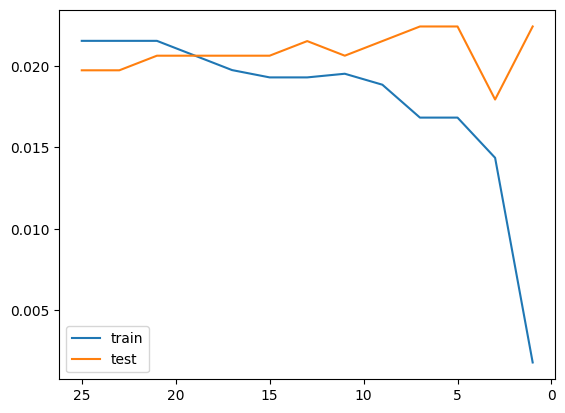

In [39]:
import matplotlib.pyplot as plt

training_errors = []
testing_errors = []

k_values = list(range(1, 26, 2))

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    knn_classifier.fit(X_train, y_train)

    y_train_pred = knn_classifier.predict(X_train)

    y_test_pred = knn_classifier.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_train_pred)

    accuracy_test = accuracy_score(y_test, y_test_pred)

    training_errors.append(1 - accuracy_train)
    testing_errors.append(1 - accuracy_test)

fig, ax = plt.subplots()
ax.plot(k_values, training_errors, label='train')
ax.plot(k_values, testing_errors, label='test')
ax.legend()
ax.invert_xaxis()
plt.show()

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score


data = pd.read_csv('Brazil_rents_sm.csv')

data

,log_rent,log_area,sqrt_hoa,rooms,furnished,bathroom,animal_accept
0,8.771835,5.298317,0.000000,4.0,0,5.0,1
1,8.714568,5.521461,0.000000,7.0,1,5.0,1
2,7.675082,4.174387,17.320508,1.0,0,1.0,1
3,9.678467,6.173786,0.000000,4.0,0,5.0,1
4,7.446585,4.007333,17.320508,2.0,0,1.0,1
...,...,...,...,...,...,...,...
4995,6.833032,3.761200,14.106736,2.0,0,1.0,1
4996,8.878637,5.117994,36.262929,3.0,0,3.0,1
4997,6.633318,2.708050,7.071068,1.0,0,1.0,1
4998,8.967759,5.480639,52.915026,4.0,0,4.0,1


In [41]:
X = data.drop('log_rent', axis=1)
y = data['log_rent']


knn_regressor = KNeighborsRegressor(n_neighbors=10)

In [42]:
knn_regressor.fit(X, y)

KNeighborsRegressor(n_neighbors=10)

In [43]:
y_pred = knn_regressor.predict(X)


rmse_train = np.sqrt(mean_squared_error(y, y_pred))

print("Training RMSE:", rmse_train)

Training RMSE: 0.3297093079244363


In [44]:
X = data.drop('log_rent', axis=1)
y = data['log_rent']


knn_regressor = KNeighborsRegressor(n_neighbors=10)


neg_mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)


cross_val_rmse = np.sqrt(-cross_val_score(knn_regressor, X, y, cv=5, scoring=neg_mse_scorer).mean())


print("Generalizable RMSE:", cross_val_rmse)

Generalizable RMSE: 0.36686936288484395


In [45]:

X = data.drop(columns=['log_rent'])
y = data['log_rent']


knn_regressor = KNeighborsRegressor(n_neighbors=10)

neg_mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)


fold_sizes = [10, 20, 50, len(X)]

results = []



for fold_size in fold_sizes:
    cv = LeaveOneOut() if fold_size == len(X) else fold_size
    
    neg_mse_scores = cross_val_score(knn_regressor, X, y, cv=cv, scoring=neg_mse_scorer)
    rmse_scores = np.sqrt(-neg_mse_scores)
    
    mean_rmse = np.mean(rmse_scores)
    std_rmse = np.std(rmse_scores)
    
    results.append([fold_size, mean_rmse, std_rmse])

results_df = pd.DataFrame(results, columns=['Fold Size', 'Mean RMSE', 'Std Deviation RMSE'])

print(results_df)

results_df.to_csv('cross_validation_results_table.csv', index=False)

   Fold Size  Mean RMSE  Std Deviation RMSE
0         10   0.365331            0.014785
1         20   0.365026            0.021358
2         50   0.362913            0.036209
3       5000   0.283502            0.231144


In [47]:

X = data.drop(columns=['log_rent'])
y = data['log_rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=307)

knn_regressor = KNeighborsRegressor(n_neighbors=10)

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test RMSE: {rmse}")


Test RMSE: 0.3702635776964802


In [48]:

X = data.drop(columns=['log_rent'])
y = data['log_rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

knn_regressor = KNeighborsRegressor(n_neighbors=10)

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"New Test RMSE (Different Random State): {rmse}")

New Test RMSE (Different Random State): 0.3640877033589107
